In [114]:
from engine import Engine
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from scipy.stats import maxwell
import time
sns.set(color_codes=True)

In [115]:
e = Engine()
e.load_settings("./settings.yaml")
#e.load_positions("./data.xyz")

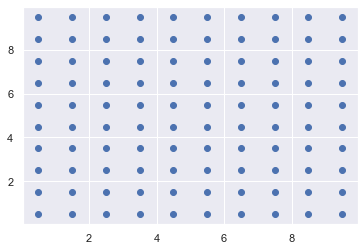

In [116]:
initpos = e.pos.copy()
ax1 = plt.scatter(initpos[:, 0], initpos[:, 1])

In [117]:
velocities = np.zeros(e.N)
for i_ in range(10000):
    e.step_forward()
endpos = e.pos.copy()
scale = np.sqrt(e.avgT)    
velocities = np.sqrt(e.vel[:, 0] * e.vel[:, 0] + e.vel[:, 1] * e.vel[:, 1])
a = maxwell.rvs(size=e.N, scale=scale)

time: 0.0001
iterations: 1
E: 0.0
avgT: 0.0
instantT: 0.0

time: 0.0002
iterations: 2
E: -26.472313432033616
avgT: 0.0
instantT: 0.6971250392653503

time: 0.0003
iterations: 3
E: -26.47231341948664
avgT: 0.0
instantT: 0.6971076701357489

time: 0.0004
iterations: 4
E: -26.47231340408233
avgT: 0.0
instantT: 0.6970787235660757

time: 0.0005
iterations: 5
E: -26.472313385819618
avgT: 0.0
instantT: 0.6970382017823026

time: 0.0006
iterations: 6
E: -26.472313364696717
avgT: 0.6969861075043956
instantT: 0.6969861075043956

time: 0.0007
iterations: 7
E: -26.472313340712873
avgT: 0.6969861075043956
instantT: 0.6969224439464705

time: 0.0008
iterations: 8
E: -26.472313313865982
avgT: 0.6969861075043956
instantT: 0.696847214816958

time: 0.0009
iterations: 9
E: -26.472313284154666
avgT: 0.6969861075043956
instantT: 0.6967604243187779

time: 0.0010
iterations: 10
E: -26.472313251576978
avgT: 0.6969861075043956
instantT: 0.6966620771495221

time: 0.0011
iterations: 11
E: -46.15866002267568
avgT: 0.

time: 0.0082
iterations: 82
E: -42.03543756005925
avgT: 0.4770634612132437
instantT: 0.515331523826648

time: 0.0083
iterations: 83
E: -42.035437368109704
avgT: 0.4770634612132437
instantT: 0.514667504429005

time: 0.0084
iterations: 84
E: -42.03543717377058
avgT: 0.4770634612132437
instantT: 0.5139958135063022

time: 0.0085
iterations: 85
E: -42.03543697704335
avgT: 0.4770634612132437
instantT: 0.5133164833698308

time: 0.0086
iterations: 86
E: -42.03543677792972
avgT: 0.47915558389041785
instantT: 0.5126295467252037

time: 0.0087
iterations: 87
E: -42.0354365764313
avgT: 0.47915558389041785
instantT: 0.5119350366719113

time: 0.0088
iterations: 88
E: -42.035436372549725
avgT: 0.47915558389041785
instantT: 0.51123298670286

time: 0.0089
iterations: 89
E: -42.035436166286885
avgT: 0.47915558389041785
instantT: 0.5105234307038952

time: 0.0090
iterations: 90
E: -42.035435957644694
avgT: 0.47915558389041785
instantT: 0.5098064029533055

time: 0.0091
iterations: 91
E: -39.820807323448676


E: -36.31921813397888
avgT: 0.5012287067070362
instantT: 0.49401221291693387

time: 0.0163
iterations: 163
E: -36.31921773862791
avgT: 0.5012287067070362
instantT: 0.4927714154642885

time: 0.0164
iterations: 164
E: -36.319217341131235
avgT: 0.5012287067070362
instantT: 0.49152598354065913

time: 0.0165
iterations: 165
E: -36.319216941503925
avgT: 0.5012287067070362
instantT: 0.490275982601989

time: 0.0166
iterations: 166
E: -36.31921653976156
avgT: 0.5008587906989477
instantT: 0.48902147844011346

time: 0.0167
iterations: 167
E: -36.31921613591981
avgT: 0.5008587906989477
instantT: 0.4877625371800665

time: 0.0168
iterations: 168
E: -36.3192157299942
avgT: 0.5008587906989477
instantT: 0.4864992252773409

time: 0.0169
iterations: 169
E: -36.319215322001014
avgT: 0.5008587906989477
instantT: 0.48523160951510436

time: 0.0170
iterations: 170
E: -36.31921491195731
avgT: 0.5008587906989477
instantT: 0.4839597570013685

time: 0.0171
iterations: 171
E: -36.40197720864913
avgT: 0.50029988826

time: 0.0239
iterations: 239
E: -33.27749048880608
avgT: 0.48527693106489883
instantT: 0.4194074707096132

time: 0.0240
iterations: 240
E: -33.27748997593189
avgT: 0.48527693106489883
instantT: 0.417963757769462

time: 0.0241
iterations: 241
E: -32.01378529256324
avgT: 0.4841077838844527
instantT: 0.4291578664034826

time: 0.0242
iterations: 242
E: -32.01378477224177
avgT: 0.4841077838844527
instantT: 0.42769399914373774

time: 0.0243
iterations: 243
E: -32.01378425163996
avgT: 0.4841077838844527
instantT: 0.4262309226546591

time: 0.0244
iterations: 244
E: -32.013783730797456
avgT: 0.4841077838844527
instantT: 0.42476872133893295

time: 0.0245
iterations: 245
E: -32.01378320975468
avgT: 0.4841077838844527
instantT: 0.4233074796212273

time: 0.0246
iterations: 246
E: -32.0137826885519
avgT: 0.48283716139582583
instantT: 0.42184728194173887

time: 0.0247
iterations: 247
E: -32.01378216722979
avgT: 0.48283716139582583
instantT: 0.4203882127496985

time: 0.0248
iterations: 248
E: -32.0137

time: 0.0321
iterations: 321
E: -15.439175677537136
avgT: 0.47341613467721966
instantT: 0.4771556286880215

time: 0.0322
iterations: 322
E: -15.439175156060998
avgT: 0.47341613467721966
instantT: 0.475694370117064

time: 0.0323
iterations: 323
E: -15.439174637365376
avgT: 0.47341613467721966
instantT: 0.4742391963485552

time: 0.0324
iterations: 324
E: -15.439174121505225
avgT: 0.47341613467721966
instantT: 0.47279019053355453

time: 0.0325
iterations: 325
E: -15.439173608535349
avgT: 0.47341613467721966
instantT: 0.4713474353573322

time: 0.0326
iterations: 326
E: -15.439173098510594
avgT: 0.4733622097288134
instantT: 0.4699110130308094

time: 0.0327
iterations: 327
E: -15.4391725914857
avgT: 0.4733622097288134
instantT: 0.4684810052820214

time: 0.0328
iterations: 328
E: -15.43917208751494
avgT: 0.4733622097288134
instantT: 0.4670574933476074

time: 0.0329
iterations: 329
E: -15.439171586652996
avgT: 0.4733622097288134
instantT: 0.46564055796432563

time: 0.0330
iterations: 330
E: -1

time: 0.0399
iterations: 399
E: 2.1443146618432394
avgT: 0.4820957554629439
instantT: 0.5527947658816765

time: 0.0400
iterations: 400
E: 2.1443149065567866
avgT: 0.4820957554629439
instantT: 0.5517633874859638

time: 0.0401
iterations: 401
E: 4.189681415158439
avgT: 0.4832095074629546
instantT: 0.5711959154637999

time: 0.0402
iterations: 402
E: 4.1896816525176135
avgT: 0.4832095074629546
instantT: 0.570166334319491

time: 0.0403
iterations: 403
E: 4.189681883916826
avgT: 0.4832095074629546
instantT: 0.5691470047801056

time: 0.0404
iterations: 404
E: 4.189682109333553
avgT: 0.4832095074629546
instantT: 0.5681379636940574

time: 0.0405
iterations: 405
E: 4.189682328745853
avgT: 0.4832095074629546
instantT: 0.5671392469586474

time: 0.0406
iterations: 406
E: 4.189682542132907
avgT: 0.484233475142631
instantT: 0.5661508895167424

time: 0.0407
iterations: 407
E: 4.189682749474457
avgT: 0.484233475142631
instantT: 0.5651729253535868

time: 0.0408
iterations: 408
E: 4.189682950751305
avgT:

time: 0.0480
iterations: 480
E: 11.548816873469065
avgT: 0.49990674090775206
instantT: 0.593716025183529

time: 0.0481
iterations: 481
E: 11.55988812531735
avgT: 0.5008825797151266
instantT: 0.5935872664157104

time: 0.0482
iterations: 482
E: 11.55988789016638
avgT: 0.5008825797151266
instantT: 0.5933577792392648

time: 0.0483
iterations: 483
E: 11.559887650011923
avgT: 0.5008825797151266
instantT: 0.5931382630689854

time: 0.0484
iterations: 484
E: 11.559887404899015
avgT: 0.5008825797151266
instantT: 0.5929286800357096

time: 0.0485
iterations: 485
E: 11.559887154872754
avgT: 0.5008825797151266
instantT: 0.5927289914837464

time: 0.0486
iterations: 486
E: 11.559886899979489
avgT: 0.5018274928930941
instantT: 0.5925391579779778

time: 0.0487
iterations: 487
E: 11.559886640265653
avgT: 0.5018274928930941
instantT: 0.5923591393110526

time: 0.0488
iterations: 488
E: 11.559886375778277
avgT: 0.5018274928930941
instantT: 0.5921888945106744

time: 0.0489
iterations: 489
E: 11.5598861065652

time: 0.0561
iterations: 561
E: 5.455036218844327
avgT: 0.510843221939116
instantT: 0.5415645529423148

time: 0.0562
iterations: 562
E: 5.455035775902729
avgT: 0.510843221939116
instantT: 0.5419594303850732

time: 0.0563
iterations: 563
E: 5.4550353322970295
avgT: 0.510843221939116
instantT: 0.542359909014279

time: 0.0564
iterations: 564
E: 5.455034888085095
avgT: 0.510843221939116
instantT: 0.5427659182570527

time: 0.0565
iterations: 565
E: 5.45503444332445
avgT: 0.510843221939116
instantT: 0.5431773874356355

time: 0.0566
iterations: 566
E: 5.4550339980729845
avgT: 0.5111330540084734
instantT: 0.5435942457765035

time: 0.0567
iterations: 567
E: 5.455033552388066
avgT: 0.5111330540084734
instantT: 0.5440164224194526

time: 0.0568
iterations: 568
E: 5.455033106327129
avgT: 0.5111330540084734
instantT: 0.5444438464266569

time: 0.0569
iterations: 569
E: 5.455032659946767
avgT: 0.5111330540084734
instantT: 0.5448764467916964

time: 0.0570
iterations: 570
E: 5.455032213304051
avgT: 0.51

instantT: 0.49824005632387575

time: 0.0639
iterations: 639
E: -2.966458066426391
avgT: 0.51148610854346
instantT: 0.4988532277714479

time: 0.0640
iterations: 640
E: -2.9664584008539165
avgT: 0.51148610854346
instantT: 0.49946782749698676

time: 0.0641
iterations: 641
E: -4.089464173509086
avgT: 0.5113092932204144
instantT: 0.48885374719363006

time: 0.0642
iterations: 642
E: -4.089464500041892
avgT: 0.5113092932204144
instantT: 0.48946414574090896

time: 0.0643
iterations: 643
E: -4.089464824410882
avgT: 0.5113092932204144
instantT: 0.4900759457162098

time: 0.0644
iterations: 644
E: -4.089465146589305
avgT: 0.5113092932204144
instantT: 0.4906890948083463

time: 0.0645
iterations: 645
E: -4.089465466551751
avgT: 0.5113092932204144
instantT: 0.49130354104610346

time: 0.0646
iterations: 646
E: -4.0894657842721
avgT: 0.5111589826745386
instantT: 0.49191923280244254

time: 0.0647
iterations: 647
E: -4.089466099725122
avgT: 0.5111589826745386
instantT: 0.49253611879863646

time: 0.0648
i

time: 0.0716
iterations: 716
E: -10.595602064677308
avgT: 0.5076918526063767
instantT: 0.4696070770180462

time: 0.0717
iterations: 717
E: -10.595602192025645
avgT: 0.5076918526063767
instantT: 0.47019495127799726

time: 0.0718
iterations: 718
E: -10.595602316940003
avgT: 0.5076918526063767
instantT: 0.47078230145500216

time: 0.0719
iterations: 719
E: -10.595602439424034
avgT: 0.5076918526063767
instantT: 0.4713691066914913

time: 0.0720
iterations: 720
E: -10.595602559482217
avgT: 0.5076918526063767
instantT: 0.47195534651399274

time: 0.0721
iterations: 721
E: -11.311532174551559
avgT: 0.507398032142848
instantT: 0.4653817058582389

time: 0.0722
iterations: 722
E: -11.311532289246557
avgT: 0.507398032142848
instantT: 0.4659623517572581

time: 0.0723
iterations: 723
E: -11.311532401584834
avgT: 0.507398032142848
instantT: 0.4665424691234408

time: 0.0724
iterations: 724
E: -11.31153251157172
avgT: 0.507398032142848
instantT: 0.4671220391086452

time: 0.0725
iterations: 725
E: -11.311

time: 0.0797
iterations: 797
E: -14.903204597630712
avgT: 0.5035571539909514
instantT: 0.47083140291801767

time: 0.0798
iterations: 798
E: -14.903204576541896
avgT: 0.5035571539909514
instantT: 0.47134016057373884

time: 0.0799
iterations: 799
E: -14.903204554405889
avgT: 0.5035571539909514
instantT: 0.4718483442931493

time: 0.0800
iterations: 800
E: -14.903204531242224
avgT: 0.5035571539909514
instantT: 0.4723559567931674

time: 0.0801
iterations: 801
E: -15.237237396425812
avgT: 0.5033444384789107
instantT: 0.46952267206446124

time: 0.0802
iterations: 802
E: -15.237237371506374
avgT: 0.5033444384789107
instantT: 0.4700273787774901

time: 0.0803
iterations: 803
E: -15.237237345636828
avgT: 0.5033444384789107
instantT: 0.4705315651962263

time: 0.0804
iterations: 804
E: -15.237237318836897
avgT: 0.5033444384789107
instantT: 0.4710352346555926

time: 0.0805
iterations: 805
E: -15.237237291126561
avgT: 0.5033444384789107
instantT: 0.4715383906425481

time: 0.0806
iterations: 806
E: -1

KeyboardInterrupt: 

In [ ]:
sns.distplot(velocities, bins=15, hist=False, kde=True, label="Engine")
sns.distplot(a, bins=15, hist=False, kde=True, label="Maxwell PDF")
plt.title("Velocity Distribution")
plt.xlabel("Velocities")
plt.ylabel("Frequency")

In [ ]:
plt.scatter(endpos[:, 0], endpos[:, 1], color="black", label="Final")
plt.scatter(initpos[:, 0], initpos[:, 1], color="red", label="Initial")
plt.title("Particle Positions")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

In [84]:
print(velocities)

[1.08584642 1.52473929 0.60597758 1.05546008 0.84384352 0.48707079
 0.64847098 0.77091887 0.40878386 1.42079712 0.74911009 0.50431504
 0.37191594 1.39687198 1.19323701 0.80443344 0.67231622 0.87908822
 1.30469832 1.65297702 0.14076608 0.42907577 0.9978272  0.50116862
 0.72630038 1.27350704 0.2592776  0.3844208  1.54957871 0.63528444
 1.0479937  0.81982072 0.05914662 1.88200857 1.7450994  0.28335509
 1.72265345 0.99463275 0.43628709 0.90735663 1.56770453 1.01610577
 1.61050612 0.34534536 0.8058509  0.73590302 1.76963496 0.74389236
 0.85176334 0.94798125 1.06966636 0.51706387 0.57400601 1.21538355
 0.78244439 0.60572237 0.59367774 1.06373943 0.79108134 1.01577643
 0.95064897 1.30754515 1.30968885 0.69247402 0.23783608 0.72685962
 0.59110458 0.95242879 1.50327015 0.6999875  0.92951945 0.44296381
 0.76959168 2.23194026 0.45995459 0.56720663 0.94943883 1.64238376
 1.36132295 0.32831463 0.25909403 1.28674416 0.42471843 0.91710771
 0.65911976 0.99800387 0.47677008 0.28618197 0.88501149 1.3972

In [85]:
print(a)

[0.87927626 1.19506576 1.02341611 1.768017   1.18109993 0.70631442
 1.00168661 0.97938423 0.42408566 1.07970412 1.18384212 1.48300219
 0.53753033 1.48684395 2.12688401 1.39936309 0.28488519 1.47219182
 0.58879066 0.91694108 0.77791977 1.40510554 1.64581854 0.40981828
 0.97080386 1.06229986 0.65672162 0.5640599  1.18277259 1.96868228
 1.03301901 0.72696971 0.77649303 1.10082891 1.00158897 0.56122702
 0.54509621 0.72599575 2.33659444 0.82524879 0.77866531 1.63765764
 0.13695441 0.69458898 0.52310763 0.49313014 1.23912762 1.76305982
 1.63972315 1.54941999 0.93845424 1.1552998  1.57875663 2.37513986
 1.26531715 0.36393417 0.75253384 0.81539071 0.33420773 1.4678069
 1.04923458 0.80822447 0.9513262  0.62554174 0.58836928 0.88077373
 1.45211763 0.77211486 0.44739522 1.48445572 0.75541137 1.88032466
 0.61671847 1.0829443  1.0977652  0.97370596 1.43585456 0.46925655
 1.76606971 1.5282214  0.55460363 0.55218875 0.78863792 1.61078126
 1.11128662 1.40325979 0.55465586 1.02681696 1.2357395  1.01067